In [ ]:
import pandas as pd
import numpy as np

df = pd.read_excel("C:\\Users\Sharad Dhawale\\OneDrive\Documents\\MyProjects\\ShipmentSure\\shipment_dataset_10000.xlsx")
data = df.copy()

# 2. NUMERICAL OUTLIERS

outliers = np.random.choice(data.index, size=100, replace=False)
# data.loc[outliers, "on_time_delivery"] = np.random.choice([5, 7, -1], size=100)
# supplier_rating
data.loc[outliers, "supplier_rating"] = np.random.uniform(10.0, 20.0, size=100).round(1)



# 3. MISSING VALUES
missing_values = np.random.choice(data.index, size=50, replace=False)
data.loc[missing_values, ["supplier_lead_time", "supplier_id", "total_order_value"]] = np.nan

# 4. INVALID CATEGORICAL VALUES

invalid_modes = ["Teleport", "Dragon", "UFO"]
cat_idx = np.random.choice(data.index, 30, replace=False)
data.loc[cat_idx, "shipment_mode"] = np.random.choice(invalid_modes, size=30)


# 5. DUPLICATES
duplicate_sample = data.sample(20)
data = pd.concat([data, duplicate_sample], ignore_index=True)

data.to_csv("supply_chain_with_anom.csv", index=False)

"Anomalies added successfully!"


'Anomalies added successfully!'

In [ ]:
#code with knowing where anomalies are added

import pandas as pd

df = pd.read_csv("supply_chain_with_anom.csv")

# 1. NUMERICAL OUTLIERS
outlier_supplier_rating = df[(df["supplier_rating"] >5)]
outlier_on_time = df[~df["on_time_delivery"].isin([0, 1])]

# 2. MISSING VALUES

missing_values = df[df[["supplier_lead_time", "supplier_id", "total_order_value"]].isna().any(axis=1)]

# 3. INVALID CATEGORICAL VALUES

valid_modes = ["Air", "Road", "Sea"] 
invalid_modes = df[~df["shipment_mode"].isin(valid_modes)]

# 4. DUPLICATES
duplicate_rows = df[df.duplicated(keep=False)]



#  RESULTS

print("\n===== OUTLIER: Supplier Rating >5 or <1 =====")
print(outlier_supplier_rating)

print("\n===== OUTLIER: Invalid On-Time Delivery Values =====")
print(outlier_on_time)

print("\n===== ROWS WITH MISSING VALUES =====")
print(missing_values)

print("\n===== INVALID SHIPMENT MODES =====")
print(invalid_modes)

print("\n===== DUPLICATE ROWS =====")
print(duplicate_rows)



===== OUTLIER: Supplier Rating >5 or <1 =====
      order_id  supplier_id  supplier_rating  supplier_lead_time  order_date  \
42          43       3472.0             15.2                 7.0  2024-02-01   
195        196       5085.0             19.9                10.0  2024-05-05   
296        297       4600.0             12.1                 5.0  2024-02-23   
797        798       1442.0             16.4                 6.0  2024-06-08   
798        799       3161.0             20.0                 6.0  2024-03-04   
...        ...          ...              ...                 ...         ...   
9872      9873       5874.0             16.5                 8.0  2024-03-11   
9912      9913       9460.0             19.2                 2.0  2024-06-30   
9973      9974       3459.0             17.4                10.0  2024-10-04   
9983      9984       4401.0             18.8                 2.0  2024-08-08   
9998      9999       1633.0             17.4                 8.0  2024-05


1. MISSING VALUES DETECTION

Column: supplier_id
Missing Count: 50
Missing at Indexes (first 20): [29, 197, 397, 570, 835, 1235, 1386, 1426, 1646, 1657, 1696, 1717, 2170, 2381, 2587, 2697, 3357, 3374, 3627, 3764]

Column: supplier_lead_time
Missing Count: 50
Missing at Indexes (first 20): [29, 197, 397, 570, 835, 1235, 1386, 1426, 1646, 1657, 1696, 1717, 2170, 2381, 2587, 2697, 3357, 3374, 3627, 3764]

Column: total_order_value
Missing Count: 50
Missing at Indexes (first 20): [29, 197, 397, 570, 835, 1235, 1386, 1426, 1646, 1657, 1696, 1717, 2170, 2381, 2587, 2697, 3357, 3374, 3627, 3764]

Column: delayed_reason_code
Missing Count: 2002
Missing at Indexes (first 20): [2, 7, 10, 13, 23, 40, 45, 49, 52, 60, 68, 71, 73, 74, 75, 79, 91, 93, 96, 101]

 2. OUTLIER DETECTION (IQR)

Column: order_id - No outliers

Column: supplier_id - No outliers

Column: supplier_rating
Outliers Found: 100
Indexes (first 20): [231, 365, 490, 657, 717, 862, 1004, 1119, 1296, 1651, 1680, 1733, 1770, 1890, 199

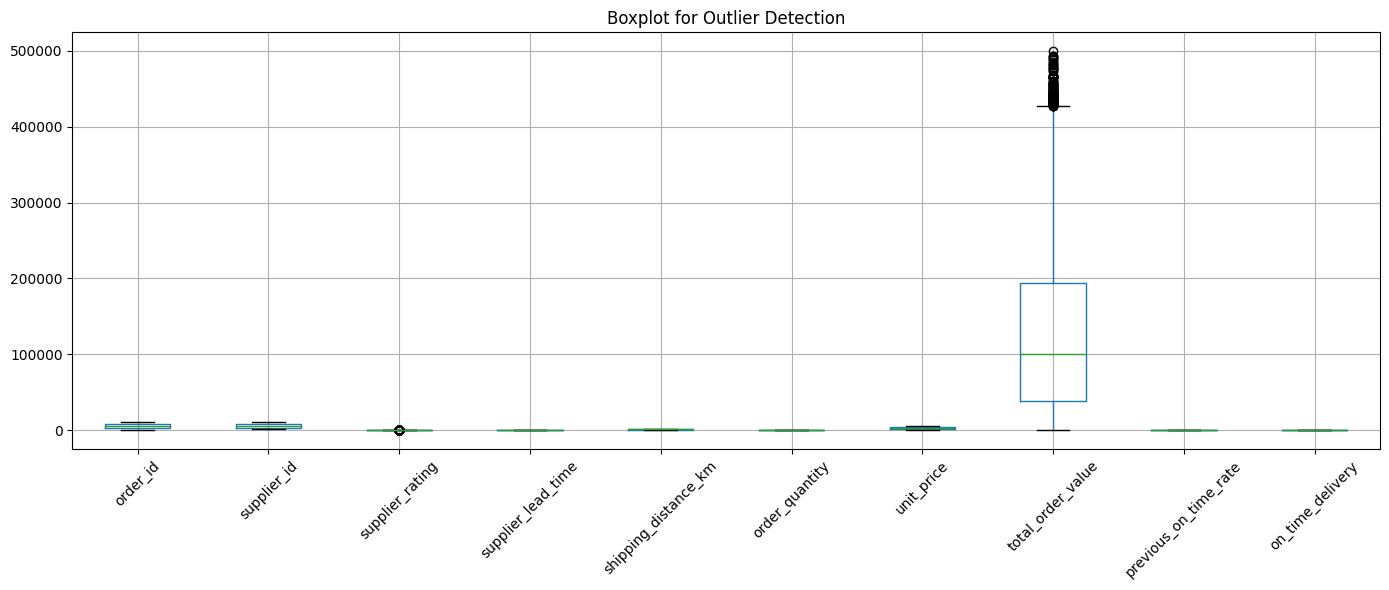

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset with anomalies
df = pd.read_csv("supply_chain_with_anom.csv")

print("\n===============================")
print("1. MISSING VALUES DETECTION")


missing = df.isnull().sum()
missing = missing[missing > 0]

if missing.empty:
    print("No missing values found.")
else:
    for col, count in missing.items():
        idx = df[df[col].isnull()].index.tolist()
        print(f"\nColumn: {col}")
        print(f"Missing Count: {count}")
        print(f"Missing at Indexes (first 20): {idx[:20]}")


print("\n===============================")
print(" 2. OUTLIER DETECTION (IQR)")


numeric_cols = df.select_dtypes(include=['number']).columns

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    if IQR == 0:  # Avoid division by zero
        continue

    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    outlier_idx = df[(df[col] < lower) | (df[col] > upper)].index.tolist()

    if outlier_idx:
        print(f"\nColumn: {col}")
        print(f"Outliers Found: {len(outlier_idx)}")
        print(f"Indexes (first 20): {outlier_idx[:20]}")
    else:
        print(f"\nColumn: {col} - No outliers")


print("\n=======================================")
print(" 3. INVALID CATEGORY VALUE DETECTION")

invalid_modes = ["Teleport", "Dragon", "UFO"]

invalid_idx = df[df["shipment_mode"].isin(invalid_modes)].index.tolist()

if invalid_idx:
    print(f"Invalid shipment_mode detected at rows: {invalid_idx[:20]}")
    print(f"Total invalid entries: {len(invalid_idx)}")
else:
    print("No invalid categorical entries found.")

    
print("\n=======================================")
print(" 4. DUPLICATE ROW DETECTION")

duplicate_idx = df[df.duplicated()].index.tolist()

if duplicate_idx:
    print(f"Duplicate row indexes: {duplicate_idx[:20]}")
    print(f"Total duplicates found: {len(duplicate_idx)}")
else:
    print("No duplicate rows found.")

print("\n===============================")
print("BOXPLOT — Outlier Visualization")

plt.figure(figsize=(14, 6))
df[numeric_cols].boxplot()
plt.title("Boxplot for Outlier Detection")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Dataset with anomalies saved 

--------------------------
1. MISSING VALUES DETECTION

Column: supplier_id
Missing Count: 49
Missing at Indexes (first 20): [221, 602, 1401, 2353, 2506, 2534, 2601, 2792, 3577, 3777, 4092, 4113, 4283, 4327, 4500, 4554, 4575, 4669, 4959, 5147]

Column: supplier_lead_time
Missing Count: 49
Missing at Indexes (first 20): [221, 602, 1401, 2353, 2506, 2534, 2601, 2792, 3577, 3777, 4092, 4113, 4327, 4500, 4554, 4575, 4669, 4959, 5147, 5605]

Column: total_order_value
Missing Count: 50
Missing at Indexes (first 20): [221, 602, 1401, 2353, 2506, 2534, 2601, 2792, 3577, 3777, 4092, 4113, 4283, 4327, 4500, 4554, 4575, 4669, 4959, 5147]

Column: delayed_reason_code
Missing Count: 2000
Missing at Indexes (first 20): [2, 7, 10, 13, 23, 40, 45, 49, 52, 60, 68, 71, 73, 74, 75, 79, 91, 93, 96, 101]

--------------------------
2. DUPLICATE ROWS DETECTION
Duplicate Rows: 20

--------------------------
3. INCORRECT CATEGORICAL VALUES DETECTION
shipment_mode: 10 invalid ent

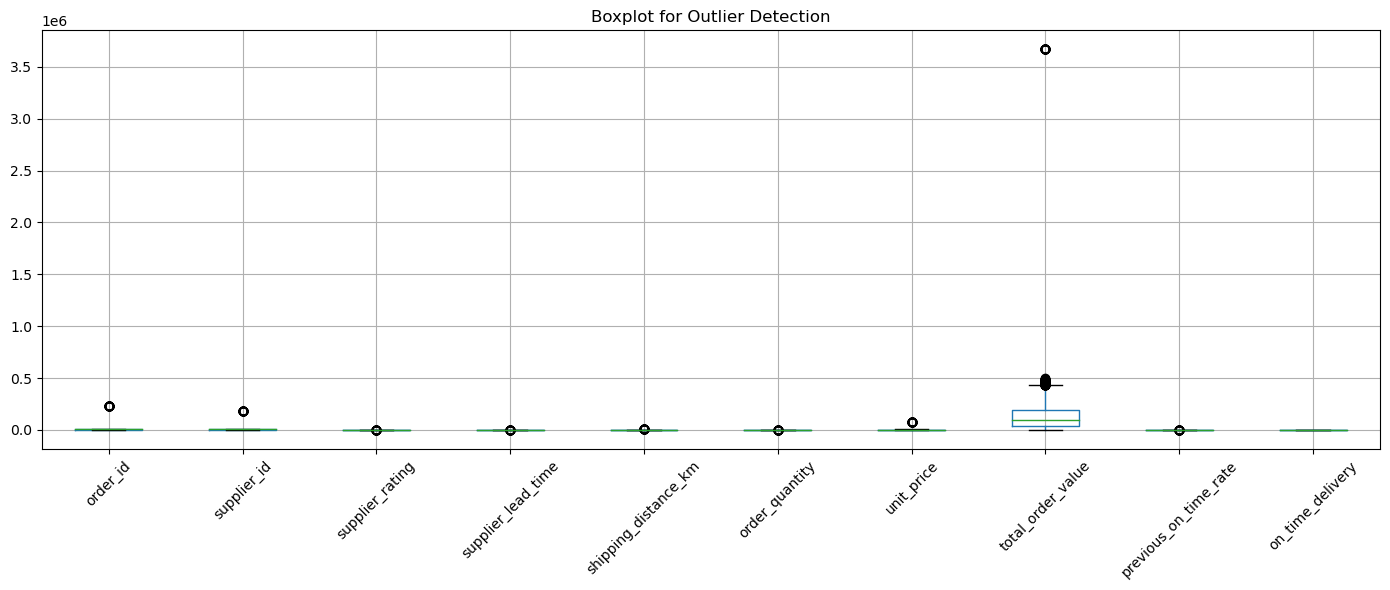

In [ ]:
# randomly adding the anomalies unlike the last time where we added specific ones


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_excel("shipment_dataset_10000.xlsx")   
df_anom = df.copy()


missing_values = np.random.choice(df_anom.index, size=50, replace=False)
df_anom.loc[missing_values, ["supplier_lead_time", "supplier_id", "total_order_value"]] = np.nan

#  Outliers in Numeric Columns 
numeric_cols = df_anom.select_dtypes(include=[np.number]).columns

for col in numeric_cols:
    outlier_idx = df_anom.sample(frac=0.005).index  
    df_anom.loc[outlier_idx, col] = (
        df_anom[col].median() * np.random.randint(10, 50)
    )


#  Duplicate Rows 
duplicate_rows = df_anom.sample(20)
df_anom = pd.concat([df_anom, duplicate_rows], ignore_index=True)


#  Incorrect Categorical Values 
cat_cols = df_anom.select_dtypes(include="object").columns

for col in cat_cols:
    wrong_idx = df_anom.sample(10).index
    df_anom.loc[wrong_idx, col] = "INVALID_VALUE"


# 3. SAVE ANOMALOUS DATASET

df_anom.to_csv("shipment_dataset_with_anom2.csv", index=False)
print("Dataset with anomalies saved ")

df=pd.read_csv("shipment_dataset_with_anom2.csv")

# 4. DETECT ANOMALIES

print("\n--------------------------")
print("1. MISSING VALUES DETECTION")
missing = df.isnull().sum()
missing = missing[missing > 0]

if missing.empty:
    print("No missing values found.")
else:
    for col, count in missing.items():
        idx = df[df[col].isnull()].index.tolist()
        print(f"\nColumn: {col}")
        print(f"Missing Count: {count}")
        print(f"Missing at Indexes (first 20): {idx[:20]}")



print("\n--------------------------")
print("2. DUPLICATE ROWS DETECTION")

print("Duplicate Rows:", df.duplicated().sum())


print("\n--------------------------")
print("3. INCORRECT CATEGORICAL VALUES DETECTION")

for col in cat_cols:
    invalid = df[df[col] == "INVALID_VALUE"]
    if not invalid.empty:
        print(f"{col}: {len(invalid)} invalid entries")


print("\n--------------------------")
print("4. OUTLIER DETECTION (USING IQR)")

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = df[(df[col] < Q1 - 1.5*IQR) | (df[col] > Q3 + 1.5*IQR)]
    print(f"{col} → {len(outliers)} outliers")


# 5. BOXPLOT FOR OUTLIER VISUALIZATION

plt.figure(figsize=(14, 6))
df_anom[numeric_cols].boxplot()
plt.title("Boxplot for Outlier Detection")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
#Fixing the anomalies that where added and detected before


df=pd.read_csv("supply_chain_with_anom.csv")
df_clean = df.copy()

# FIX MISSING VALUES

num_cols = df_clean.select_dtypes(include=['int64', 'float64']).columns
cat_cols = df_clean.select_dtypes(include=['object']).columns

for col in num_cols:
    df_clean[col].fillna(df_clean[col].median(), inplace=True)

# Fix categorical
for col in cat_cols:
    df_clean[col].fillna(df_clean[col].mode()[0], inplace=True)

print("Missing values fixed.")

# fix invalid categorical values
invalid_modes = ["Teleport", "Dragon", "UFO"]

# most frequent correct category
valid_mode = df_clean.loc[~df_clean['shipment_mode'].isin(invalid_modes), 
                          'shipment_mode'].mode()[0]

# replace invalid entries with valid most frequent value
df_clean.loc[df_clean['shipment_mode'].isin(invalid_modes), 'shipment_mode'] = valid_mode

print("Invalid categorical entries fixed.")

#outlier removal
for col in num_cols:
    Q1 = df_clean[col].quantile(0.25)
    Q3 = df_clean[col].quantile(0.75)
    IQR = Q3 - Q1

    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    # Cap values outside range
    df_clean[col] = np.where(df_clean[col] < lower, lower, df_clean[col])
    df_clean[col] = np.where(df_clean[col] > upper, upper, df_clean[col])

print("Numeric outliers capped.")

before = df_clean.shape[0]
df_clean = df_clean.drop_duplicates(subset=['order_id'], keep='first')
after = df_clean.shape[0]

df_clean.to_csv("shipment_dataset_clean_fixed.csv", index=False)
print("\nDataset successfully cleaned and saved as: shipment_dataset_clean_fixed.csv")

Missing values fixed.
Invalid categorical entries fixed.
Numeric outliers capped.

Dataset successfully cleaned and saved as: shipment_dataset_clean_fixed.csv


Dataset shape: (10000, 19)


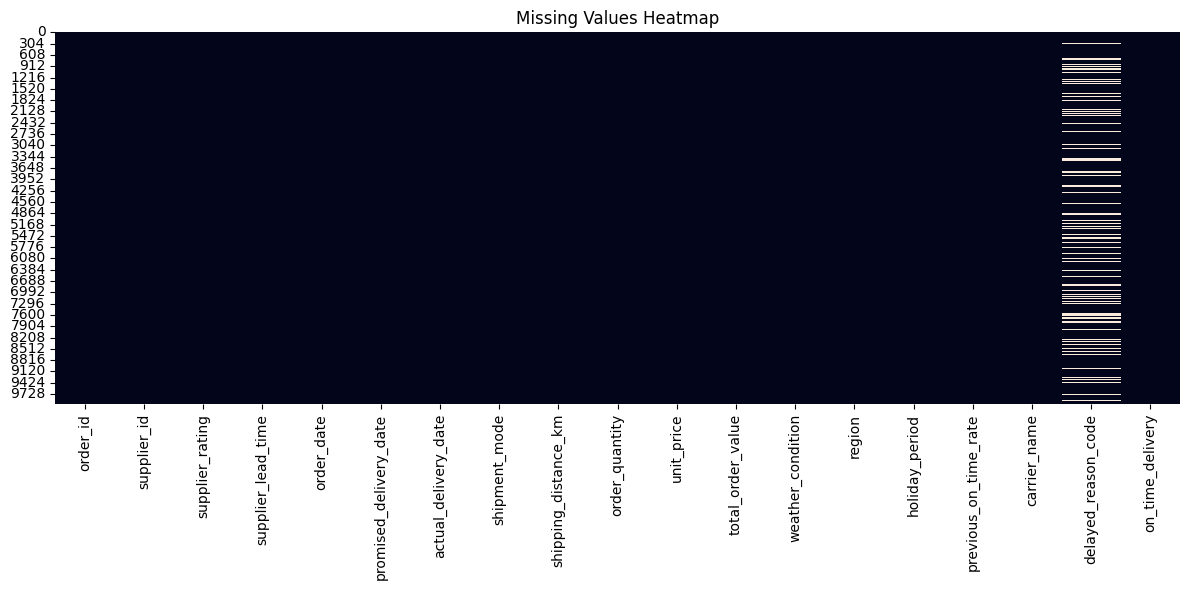

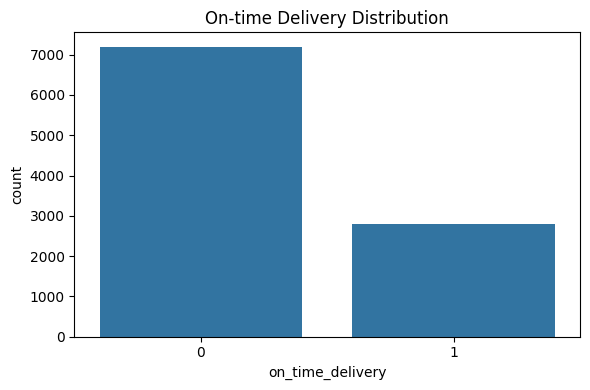

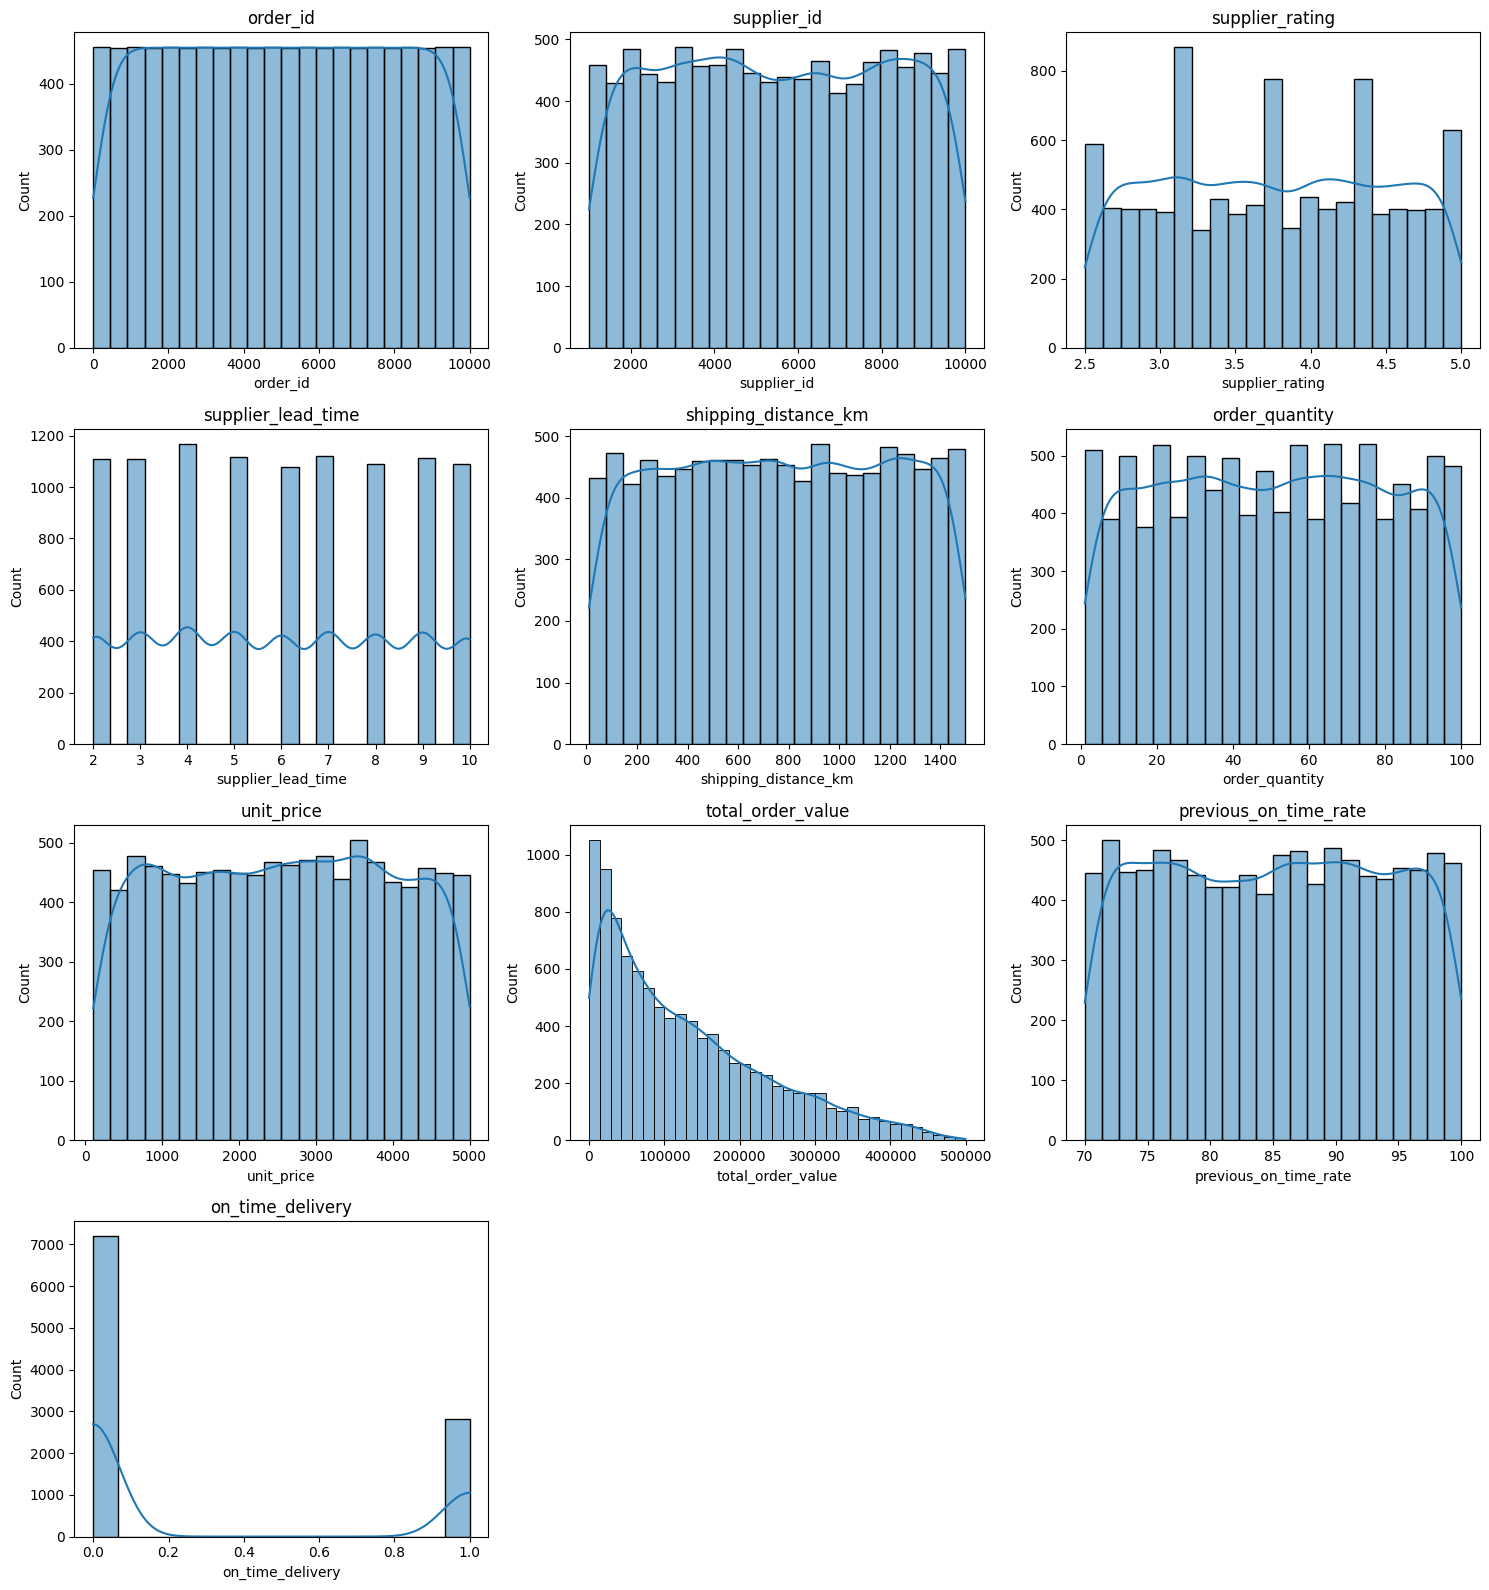

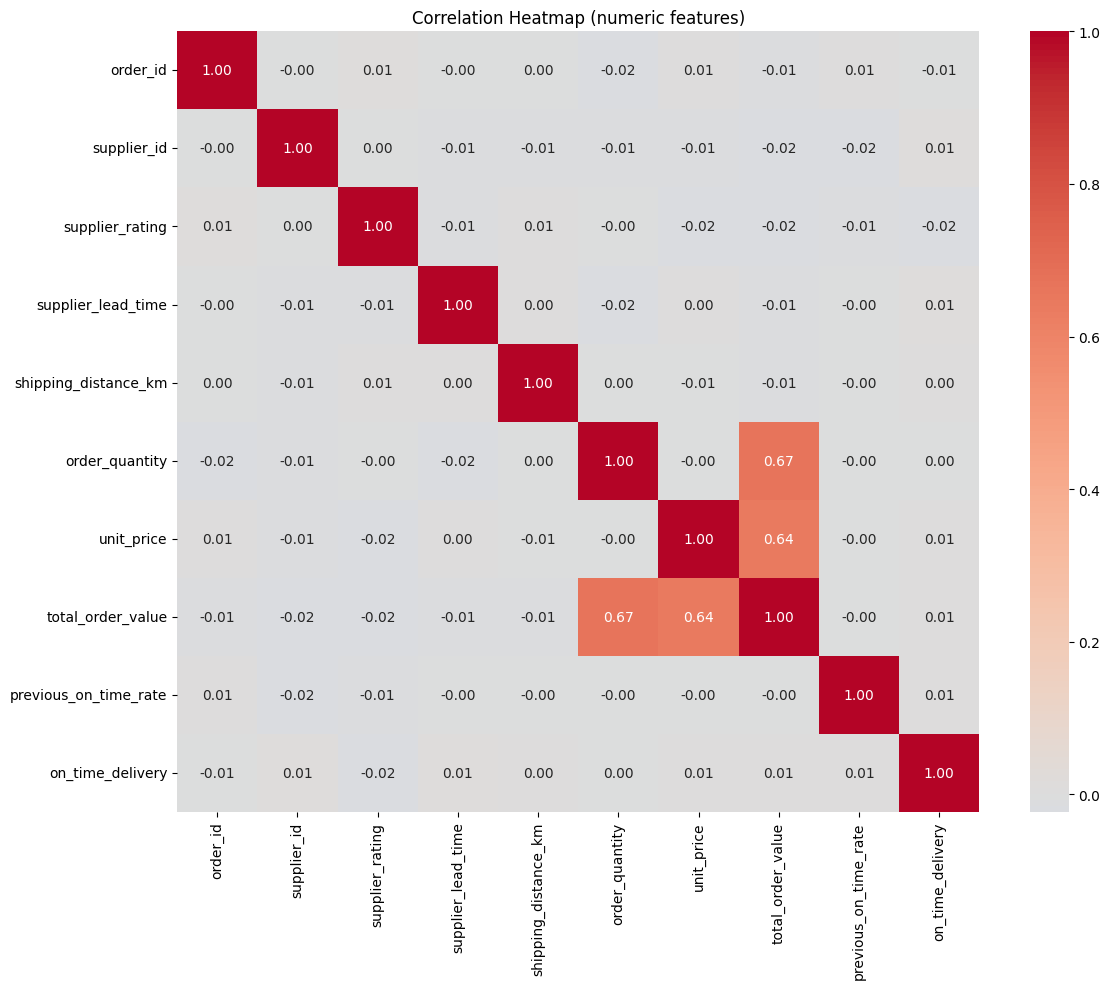

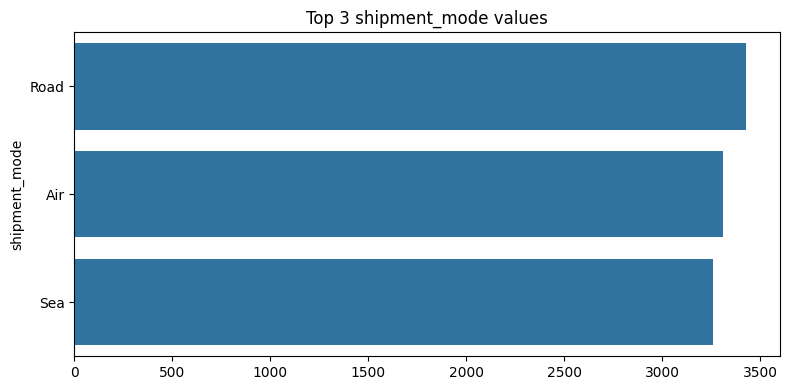

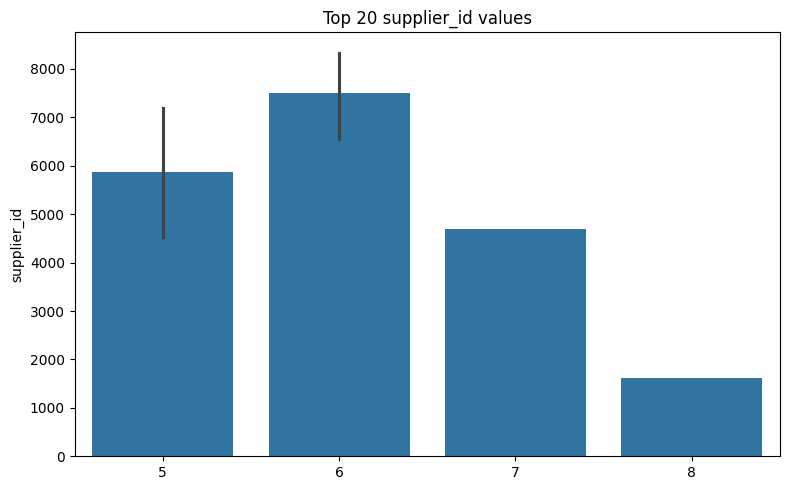

EDA plots saved to: eda_plots


In [1]:
import os
import sys
import subprocess
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

PATH_XLSX = "shipment_dataset_10000.xlsx"
PATH_CSV = "shipment_dataset_10000.csv"

if os.path.exists(PATH_XLSX):
    try:
        df = pd.read_excel(PATH_XLSX)
    except Exception as e:
        msg = str(e)
        if 'openpyxl' in msg or 'Missing optional dependency' in msg:
            print("openpyxl missing — installing it now...")
            subprocess.check_call([sys.executable, "-m", "pip", "install", "openpyxl"])
            # Retry read
            df = pd.read_excel(PATH_XLSX)
        else:
            print("Failed to read XLSX:", e)
            if os.path.exists(PATH_CSV):
                print("Falling back to CSV:", PATH_CSV)
                df = pd.read_csv(PATH_CSV)
            else:
                raise

elif os.path.exists(PATH_CSV):
    df = pd.read_csv(PATH_CSV)
else:
    print(f"File not found: {PATH_XLSX} or {PATH_CSV}. Please place it in the workspace or change PATH.")
    df = None

if df is None:
    print("No data loaded — aborting EDA.")
else:
    # Convert possible date columns
    for dcol in ['order_date', 'promised_delivery_date', 'actual_delivery_date']:
        if dcol in df.columns:
            df[dcol] = pd.to_datetime(df[dcol], errors='coerce')

    out_dir = "eda_plots"
    os.makedirs(out_dir, exist_ok=True)

    print("Dataset shape:", df.shape)

    # Save basic stats
    try:
        df.describe(include='all').to_csv(os.path.join(out_dir, "summary_stats.csv"))
    except Exception:
        pass

    # Missing values heatmap
    try:
        plt.figure(figsize=(12,6))
        sns.heatmap(df.isnull(), cbar=False)
        plt.title("Missing Values Heatmap")
        plt.tight_layout()
        plt.savefig(os.path.join(out_dir, "missing_values_heatmap.png"), bbox_inches='tight')
        plt.show()
    except Exception as e:
        print("Skipping missing values heatmap:", e)

    # Target distribution
    if 'on_time_delivery' in df.columns:
        try:
            plt.figure(figsize=(6,4))
            sns.countplot(x='on_time_delivery', data=df)
            plt.title("On-time Delivery Distribution")
            plt.tight_layout()
            plt.savefig(os.path.join(out_dir, "target_dist.png"), bbox_inches='tight')
            plt.show()
        except Exception as e:
            print("Skipping target distribution plot:", e)

    # Numeric histograms (up to 18 cols)
    try:
        num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
        if num_cols:
            sel = num_cols[:18]
            rows = (len(sel)-1)//3 + 1
            fig, axes = plt.subplots(rows, 3, figsize=(15, 4*rows))
            axes = axes.flatten()
            for i, col in enumerate(sel):
                sns.histplot(df[col].dropna(), kde=True, ax=axes[i])
                axes[i].set_title(col)
            for j in range(len(sel), len(axes)):
                axes[j].set_visible(False)
            plt.tight_layout()
            plt.savefig(os.path.join(out_dir, "numeric_histograms.png"))
            plt.show()
    except Exception as e:
        print("Skipping numeric histograms:", e)

    # Correlation heatmap
    try:
        if len(num_cols) > 1:
            corr = df[num_cols].corr()
            plt.figure(figsize=(12,10))
            sns.heatmap(corr, cmap='coolwarm', center=0,fmt=".2f", annot=True)
            plt.title("Correlation Heatmap (numeric features)")
            plt.tight_layout()
            plt.savefig(os.path.join(out_dir, "correlation_heatmap.png"))
            plt.show()
    except Exception as e:
        print("Skipping correlation heatmap:", e)

    # Categorical counts for some common columns
    for col in ['shipment_mode', 'supplier_id', 'product_id']:
        if col in df.columns:
            try:
                top = df[col].value_counts().nlargest(20)
                plt.figure(figsize=(8, max(4, len(top)*0.25)))
                sns.barplot(x=top.values, y=top.index)
                plt.title(f"Top {len(top)} {col} values")
                plt.tight_layout()
                plt.savefig(os.path.join(out_dir, f"top_{col}.png"), bbox_inches='tight')
                plt.show()
            except Exception as e:
                print(f"Skipping categorical plot for {col}:", e)

    # Scatter example
    try:
        if 'shipping_distance_km' in df.columns and 'promised_days' in df.columns:
            plt.figure(figsize=(8,6))
            hue_col = 'on_time_delivery' if 'on_time_delivery' in df.columns else None
            sns.scatterplot(x='shipping_distance_km', y='promised_days', hue=hue_col, data=df, alpha=0.6)
            plt.title("Distance vs Promised Days")
            plt.tight_layout()
            plt.savefig(os.path.join(out_dir, "distance_vs_promised.png"), bbox_inches='tight')
            plt.show()
    except Exception as e:
        print("Skipping scatter plot:", e)

    print("EDA plots saved to:", out_dir)

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# LOAD DATA
df = pd.read_excel("shipment_dataset_10000.xlsx")

# FEATURE ENGINEERING
df["promised_days"] = (df["promised_delivery_date"] - df["order_date"]).dt.days
df["actual_days"] = (df["actual_delivery_date"] - df["order_date"]).dt.days
df["delay_days"] = (df["actual_delivery_date"] - df["promised_delivery_date"]).dt.days


# Drop date columns
df = df.drop(["order_date","promised_delivery_date","actual_delivery_date","order_id","delayed_reason_code"], axis=1)


# DEFINE FEATURES & TARGET
X = df.drop("on_time_delivery", axis=1)
y = df["on_time_delivery"]

numeric_cols = X.select_dtypes(include=['int64','float64']).columns
categorical_cols = X.select_dtypes(include=['object']).columns

preprocess = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numeric_cols),
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_cols)
    ]
)

# TRAIN-TEST SPLIT (75 - 25)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)

# print("Shapes:")
# print("Train:", X_train.shape)
# print("Test:", X_test.shape)

# X_train_transformed = preprocess.fit_transform(X_train)

# print("Transformed shape:", X_train_transformed.shape)
# print(X_train_transformed[:5])


# Transform training data
X_train_transformed = preprocess.fit_transform(X_train)
feature_names = preprocess.get_feature_names_out()
X_train_df = pd.DataFrame(X_train_transformed, columns=feature_names)

# Save CSV
X_train_df.to_csv("X_train_transformed.csv", index=False)
print("Saved as X_train_transformed.csv")


Saved as X_train_transformed.csv


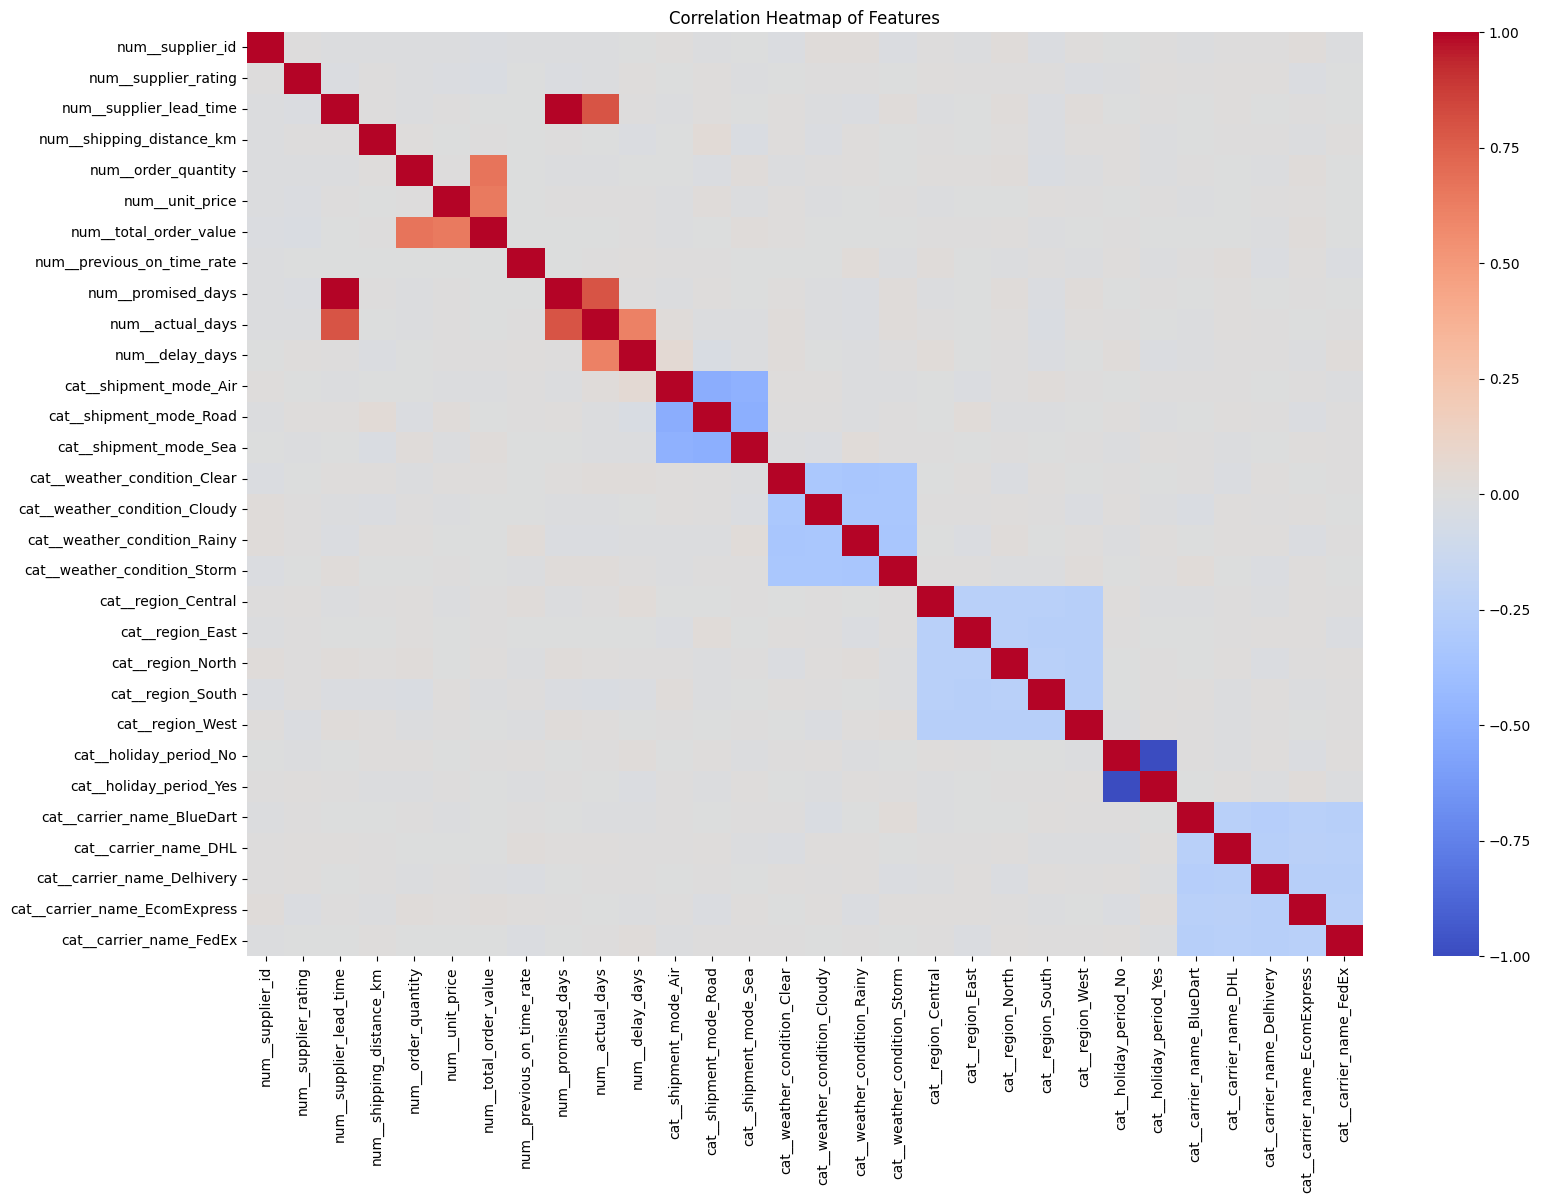

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(18, 12))
corr = X_train_df.corr()

sns.heatmap(corr, cmap="coolwarm", annot=False)
plt.title("Correlation Heatmap of Features")
plt.show()
